# Model Selection and GridSearchCV
----------

## Preparing Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("german_credit_data.csv")

In [3]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
data = data.iloc[:, [1, 2, 3, 4, 7, 8]]

In [6]:
data

,Age,Sex,Job,Housing,Credit amount,Duration
0,67,male,2,own,1169,6
1,22,female,2,own,5951,48
2,49,male,1,own,2096,12
3,45,male,2,free,7882,42
4,53,male,2,free,4870,24
...,...,...,...,...,...,...
995,31,female,1,own,1736,12
996,40,male,3,own,3857,30
997,38,male,2,own,804,12
998,23,male,2,free,1845,45


In [7]:
data = pd.concat([data.iloc[:, [2, 3, 4, 5]], data.iloc[:, [0, 1]]], axis = 1)

In [8]:
data

,Job,Housing,Credit amount,Duration,Age,Sex
0,2,own,1169,6,67,male
1,2,own,5951,48,22,female
2,1,own,2096,12,49,male
3,2,free,7882,42,45,male
4,2,free,4870,24,53,male
...,...,...,...,...,...,...
995,1,own,1736,12,31,female
996,3,own,3857,30,40,male
997,2,own,804,12,38,male
998,2,free,1845,45,23,male


<AxesSubplot:xlabel='Housing', ylabel='count'>

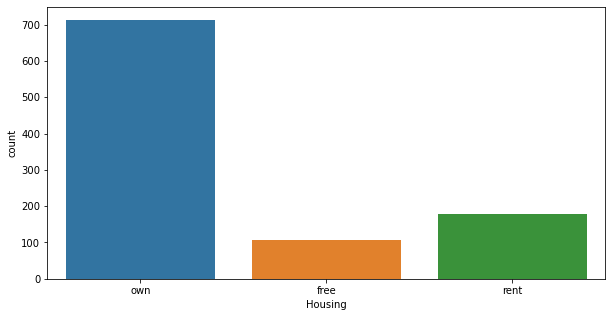

In [9]:
plt.figure(figsize = (10, 5))
sns.countplot(x = "Housing", data = data)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
le = LabelEncoder()

In [12]:
ohe = OneHotEncoder()

In [13]:
data.iloc[:, -1] = le.fit_transform(data.iloc[:, -1])

In [14]:
data_ = ohe.fit_transform(data[["Housing"]]).toarray()

In [15]:
data_ = pd.DataFrame(data = data_, columns = ["own", "rent", "free"])

In [16]:
data_ = pd.concat([data.iloc[:, 0], data_], axis = 1)

In [17]:
data = pd.concat([data_, data.iloc[:, 2:]], axis = 1)

In [18]:
data

,Job,own,rent,free,Credit amount,Duration,Age,Sex
0,2,0.0,1.0,0.0,1169,6,67,1
1,2,0.0,1.0,0.0,5951,48,22,0
2,1,0.0,1.0,0.0,2096,12,49,1
3,2,1.0,0.0,0.0,7882,42,45,1
4,2,1.0,0.0,0.0,4870,24,53,1
...,...,...,...,...,...,...,...,...
995,1,0.0,1.0,0.0,1736,12,31,0
996,3,0.0,1.0,0.0,3857,30,40,1
997,2,0.0,1.0,0.0,804,12,38,1
998,2,1.0,0.0,0.0,1845,45,23,1


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:, :-1], 
                                                                    data.iloc[:, -1:], 
                                                                    test_size = 1/3, 
                                                                    random_state = 0)

In [21]:
train_data.shape

(666, 7)

In [22]:
test_data.shape

(334, 7)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
train_data = sc.fit_transform(train_data)
test_data = sc.fit_transform(test_data)

In [26]:
train_data

array([[ 0.15136818, -0.33166248,  0.62714069, ..., -0.70116483,
        -0.73667616, -0.92448385],
       [ 1.67881077, -0.33166248,  0.62714069, ..., -0.48274083,
        -0.73667616,  0.26759019],
       [ 0.15136818, -0.33166248, -1.59453855, ..., -0.46869427,
        -0.23492775, -0.75418756],
       ...,
       [-1.3760744 , -0.33166248,  0.62714069, ...,  0.20132664,
        -0.98755037,  2.39629385],
       [-1.3760744 , -0.33166248,  0.62714069, ..., -0.46728961,
        -0.23492775, -0.41359497],
       [-1.3760744 , -0.33166248,  0.62714069, ...,  2.31708974,
         1.27031749, -0.41359497]])

In [27]:
train_labels = np.array(train_labels).astype("float")
test_labels = np.array(test_labels).astype("float")

In [28]:
train_labels

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

--------------

## K-NN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()

In [31]:
# n_neighbors default = 5
# weights = ("uniform", "distance") default = "uniform"
# metric default = "minkowski"

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [33]:
p = [{"n_neighbors": [20, 21, 22, 23, 24, 25], 
      "weights": ["uniform", "distance"], 
      "metric": ["minkowski"]}]

gs = GridSearchCV(estimator = knn, param_grid = p, scoring = "accuracy", cv = 3, n_jobs = -1)
grid_search = gs.fit(train_data, train_labels)

best_result = grid_search.best_score_
best_parameters = grid_search.best_params_

# print("The best result: ", best_result)
print("The best parameters: ", best_parameters)

The best parameters:  {'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'uniform'}


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
knn = KNeighborsClassifier(n_neighbors = 23, weights = "uniform")

In [35]:
knn.fit(train_data, train_labels)

C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_true = test_labels, y_pred = knn.predict(test_data))

In [38]:
cm

array([[ 23,  90],
       [ 21, 200]], dtype=int64)

In [39]:
cvs = cross_val_score(estimator = knn, X = train_data, y = train_labels, cv = 3)

C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
print("Accuracy: {}".format(cvs.mean() * 100))

Accuracy: 74.17417417417417


----------

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(random_state = 1)

In [43]:
# n_estimators default = 100
# criterion = ("entropy", "gini") default = "gini"

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [46]:
p = [{"n_estimators": [25, 50, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75], 
      "criterion": ["entropy", "gini"]}]

gs = GridSearchCV(estimator = rfc, param_grid = p, scoring = "accuracy", cv = 3, n_jobs = -1)
grid_search = gs.fit(train_data, train_labels)

best_result = grid_search.best_score_
best_parameters = grid_search.best_params_

print("The best result: ", best_result)
print("The best parameters: ", best_parameters)

The best result:  0.7192192192192192
The best parameters:  {'criterion': 'gini', 'n_estimators': 63}


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [47]:
rfc = RandomForestClassifier(criterion = "gini", n_estimators = 63)

In [48]:
rfc.fit(train_data, train_labels)

<ipython-input-48-95a1b4e18419>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_data, train_labels)


RandomForestClassifier(n_estimators=63)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(y_true = test_labels, y_pred = rfc.predict(test_data))

In [51]:
cm

array([[ 29,  84],
       [ 30, 191]], dtype=int64)

In [52]:
cvs = cross_val_score(estimator = rfc, X = train_data, y = train_labels, cv = 3)

C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [53]:
print("Accuracy: {}".format(cvs.mean() * 100))

Accuracy: 70.42042042042041
